train loss:2.29938662680664
=== epoch:1, train acc:0.281, test acc:0.304 ===
train loss:2.2984897298108646
train loss:2.2930967987058297
train loss:2.2829144231593093
train loss:2.2810095401829047
train loss:2.261727755449575
train loss:2.2604498355948848
train loss:2.2430974686073055
train loss:2.2050343851518956
train loss:2.2214594861983015
train loss:2.132157279469612
train loss:2.1604313361385947
train loss:2.1109094346588937
train loss:2.034437506825552
train loss:2.0035147463807754
train loss:1.9332635987658562
train loss:1.9405813028617347
train loss:1.838847482576217
train loss:1.7553568321407473
train loss:1.752695949343952
train loss:1.6117159667784058
train loss:1.4822533793857462
train loss:1.4241585070887908
train loss:1.228260844622931
train loss:1.3426173476192123
train loss:1.1020300467044235
train loss:1.1145959238556447
train loss:1.0697990570127116
train loss:1.0234069649061885
train loss:0.9362056391229997
train loss:0.7995060758844122
train loss:0.8126512768003827

train loss:0.08403932821668836
train loss:0.1274014550760532
train loss:0.1726601630279533
train loss:0.18295896776623485
train loss:0.1933431379315592
train loss:0.1665546668951348
train loss:0.18863149332992835
train loss:0.264500858013481
train loss:0.2445994196738677
train loss:0.20125944243998325
train loss:0.18671648313229533
train loss:0.21862487782468462
train loss:0.231984392315376
train loss:0.23966039705753212
train loss:0.08630614513252728
train loss:0.2113322852394113
train loss:0.11053171269462972
train loss:0.1716078692516082
train loss:0.40127746317814683
train loss:0.17683238383927255
train loss:0.15019988403526166
train loss:0.20086212115428403
train loss:0.30953960256356916
train loss:0.17709807634637895
train loss:0.30635005128085596
train loss:0.20817964251210483
train loss:0.27679487897771776
train loss:0.18445027722700452
train loss:0.13235405304990996
train loss:0.21565226086720052
train loss:0.18246139434732803
train loss:0.24446076281187193
train loss:0.140580

train loss:0.15571780772466665
train loss:0.05827242930189328
train loss:0.10266379117909821
train loss:0.05616630208612622
train loss:0.1072228305093741
train loss:0.08296786859064981
train loss:0.10227719835329978
train loss:0.18834292572820024
train loss:0.127367418857731
train loss:0.10480646971073758
train loss:0.13989874491671522
train loss:0.037599616467122086
train loss:0.17683721772194338
train loss:0.12151558160404441
train loss:0.15664859060779832
train loss:0.09077901164580107
train loss:0.07413097938173031
train loss:0.07586396008500781
train loss:0.08221723106956016
train loss:0.04014951381924876
train loss:0.0732687917402625
train loss:0.0828127612303715
train loss:0.07943362422433187
train loss:0.07837383151303427
train loss:0.08334143027696708
train loss:0.08472418195866255
train loss:0.08081507365716414
train loss:0.060019146653707646
train loss:0.04908628232300197
train loss:0.10979603279186576
train loss:0.06143883482731715
=== epoch:12, train acc:0.967, test acc:0.

train loss:0.04016524580767424
train loss:0.07829271115606877
train loss:0.05731743080438207
train loss:0.0276138126027094
train loss:0.02603581277119785
train loss:0.03877878815715824
train loss:0.027283713558599234
train loss:0.0761125113516903
train loss:0.016571129027479453
train loss:0.02925876716977879
train loss:0.018365300336264635
train loss:0.018240105169918294
train loss:0.04361803985664607
train loss:0.08038423110202636
train loss:0.02121698696160128
train loss:0.07246671140142788
train loss:0.02685544935783339
train loss:0.0406170372905287
train loss:0.01873982571335231
train loss:0.03636512393937171
train loss:0.022722265400535888
train loss:0.03404992681380258
train loss:0.029168252776552196
train loss:0.015002305944363825
train loss:0.05756664015143171
=== epoch:17, train acc:0.982, test acc:0.95 ===
train loss:0.10819469271204409
train loss:0.02144834483946862
train loss:0.020871199397487383
train loss:0.014011987851683833
train loss:0.008703309870712312
train loss:0.0

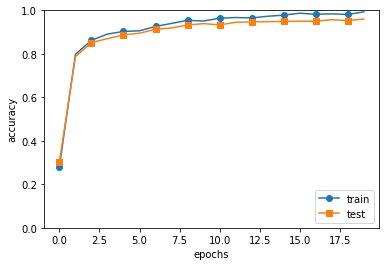

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 处理花费时间较长的情况下减少数据 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 保存参数
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
